In [47]:
#Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Import metadata
dataset_dir = '/Users/emilypark/ECE228/archive/csv/dicom_info.csv'

In [6]:
df = pd.read_csv(dataset_dir)
df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [45]:
#Display Columns of Metadata dataframe
df.columns

Index(['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated',
       'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate',
       'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber',
       'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex',
       'PhotometricInterpretation', 'PixelRepresentation',
       'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID',
       'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer',
       'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription',
       'SeriesInstanceUID', 'SeriesNumber', 'SmallestImagePixelValue',
       'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID',
       'StudyTime'],
      dtype='object')

In [23]:
#Check if any file paths are null
df['file_path'].isna().sum()

0

In [24]:
#Check if any image paths are null
df['image_path'].isna().sum()

0

<BarContainer object of 3 artists>

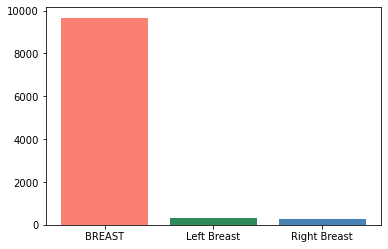

In [36]:
#Bar plot of body part examined and their counts
parts = df['BodyPartExamined'].value_counts()
parts = dict(parts)
plt.bar(list(parts.keys()), list(parts.values()), color=['salmon', 'seagreen', 'steelblue'])

In [13]:
image_types = df['SeriesDescription'].value_counts()

In [17]:
image_types = dict(image_types)
image_types

{'cropped images': 3567,
 'ROI mask images': 3247,
 'full mammogram images': 2857}

<BarContainer object of 3 artists>

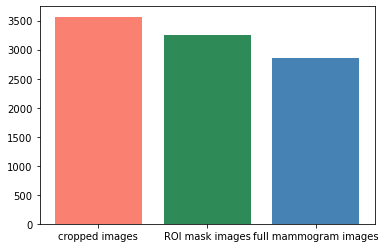

In [28]:
#Bar plot of image types
plt.bar(list(image_types.keys()), list(image_types.values()), color=['salmon', 'seagreen', 'steelblue'])

In [50]:
#Looking at training data metadata
path = '/Users/emilypark/ECE228/archive/csv/mass_case_description_train_set.csv'
train_df = pd.read_csv(path)
train_df

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [75]:
train_df['assessment'].value_counts()

4    533
5    299
3    279
0    129
2     77
1      1
Name: assessment, dtype: int64

In [60]:
train_df.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [74]:
train_df.dtypes

patient_id                 object
breast_density              int64
left or right breast       object
image view                 object
abnormality id              int64
abnormality type           object
mass shape                 object
mass margins               object
assessment                  int64
pathology                  object
subtlety                    int64
image file path            object
cropped image file path    object
ROI mask file path         object
dtype: object

In [53]:
train_df['pathology'].value_counts()

MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: pathology, dtype: int64

In [62]:
train_df2.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

<AxesSubplot:>

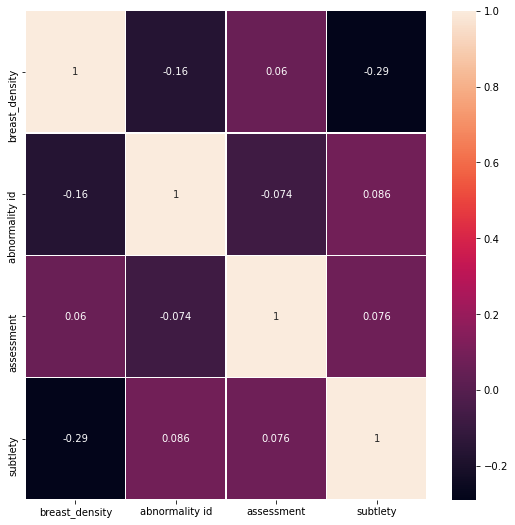

In [59]:
#Heatmap of correlation of training data metadata values
plt.figure(figsize=(9,9))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.1)

In [54]:
#Import test data
path = '/Users/emilypark/ECE228/archive/csv/mass_case_description_test_set.csv'
test_df = pd.read_csv(path)
test_df

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,P_01825,2,RIGHT,MLO,1,mass,LOBULATED,MICROLOBULATED,3,BENIGN_WITHOUT_CALLBACK,3,Mass-Test_P_01825_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...
374,P_01833,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,5,MALIGNANT,5,Mass-Test_P_01833_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...
375,P_01865,2,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,Mass-Test_P_01865_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....
376,P_01912,3,RIGHT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,4,Mass-Test_P_01912_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [72]:
test_df['left or right breast'].value_counts()

RIGHT    192
LEFT     186
Name: left or right breast, dtype: int64

In [69]:
test_df['mass shape'].value_counts()

IRREGULAR                             113
OVAL                                   91
LOBULATED                              79
ROUND                                  41
ARCHITECTURAL_DISTORTION               23
LYMPH_NODE                              9
IRREGULAR-ARCHITECTURAL_DISTORTION      7
FOCAL_ASYMMETRIC_DENSITY                6
ASYMMETRIC_BREAST_TISSUE                5
OVAL-LOBULATED                          1
IRREGULAR-ASYMMETRIC_BREAST_TISSUE      1
LOBULATED-IRREGULAR                     1
LOBULATED-LYMPH_NODE                    1
Name: mass shape, dtype: int64

In [55]:
test_df['pathology'].value_counts()

BENIGN                     194
MALIGNANT                  147
BENIGN_WITHOUT_CALLBACK     37
Name: pathology, dtype: int64

In [71]:
#Check if have same column names
test_df.columns == train_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [32]:
from PIL import Image
def show_img(path):
    image = Image.open(path)
    image.show()

In [46]:
#Show image from df.image_path.iloc[10]
path = '/Users/emilypark/ECE228/archive/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/1-003.jpg'
show_img(path)

In [64]:
train_df2.iloc[40]

patient_id                                                           P_00057
breast_density                                                             1
left or right breast                                                   RIGHT
image view                                                               MLO
abnormality id                                                             1
abnormality type                                                        mass
mass shape                                                              OVAL
mass margins                                                      SPICULATED
assessment                                                                 5
pathology                                                          MALIGNANT
subtlety                                                                   5
image file path            Mass-Training_P_00057_RIGHT_MLO/1.3.6.1.4.1.95...
cropped image file path    Mass-Training_P_00057_RIGHT_MLO_1/1.3.6.1.4.1....

In [79]:
import imagesize
data = df['image_path'].map(lambda path: imagesize.get(path))
width, height = list(zip(*data))
df['width'] = width
df['height'] = height

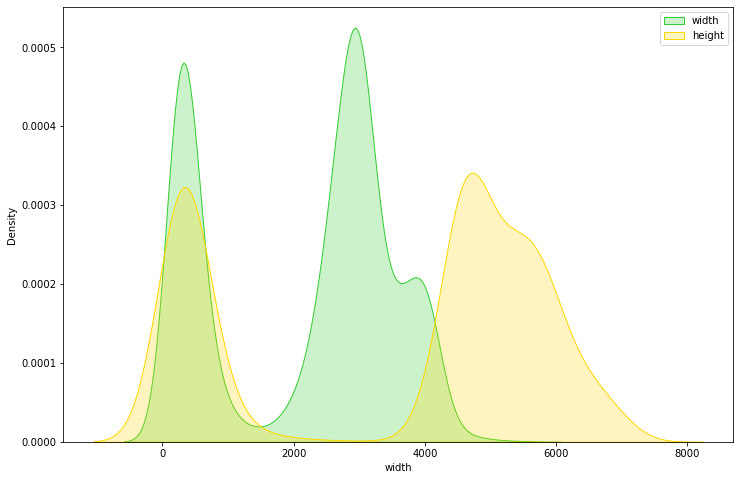

In [80]:
#Plot width and height distribution of images
plt.figure(figsize=(12,8))
sns.kdeplot(df['width'], shade=True, color='limegreen')
sns.kdeplot(df['height'], shade=True, color='gold')
plt.legend(['width','height'])